# **Assignment \#1**: Machine Learning MC886
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2020s2



In [2]:
# TODO: RA & Name 
print('198105: ' + 'Giovanni Torres Chaves')
print('222854: ' + 'Nathan Brusamarello de Souto')

198105: Giovanni Torres Chaves
222854: Nathan Brusamarello de Souto


## Objective 

Explore **linear regression** alternatives and come up with the best possible model to the problems, avoiding overfitting. In particular, predict the **price of diamonds** from their attributes (e.g., depth, clarity, color) using the Diamonds dataset (https://www.kaggle.com/shivam2503/diamonds)

## Dataset

The Diamonds dataset contains the prices and attributes of almost 50,000 diamonds.

Dataset Information: You should respect the following traininig/test split: 45,000 training examples, and 5,000 test examples.

There are 9 attributes as follows: 

- 1: **carat**: weight of the diamond (0.2-5.01)
- 2: **cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- 3: **color**: diamond color, from J (worst) to D (best)
- 4: **clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- 5: **x**: length in mm (0-10.74)
- 6: **y**: width in mm (0-58.9)
- 7: **z**: depth in mm (0-31.8)
- 8: **depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)
- 9: **table**: width of top of diamond relative to widest point (43-95)


target **price**: price in US dollars

The data is available at
https://www.dropbox.com/s/tmz8bkocrpfmfb9/diamonds-dataset.zip


## Deadline

Monday, October 12th 7 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you did, your grade will be penalized as follows:
- October 13th 7 pm : grade * 0.75
- October 14th 7 pm : grade * 0.5
- October 15th 7 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**

## Activities

1. (4 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)



In [3]:
# TODO: Load and preprocess your dataset.

from google.colab import drive #importei meu drive para pegar os dados
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#importando bibliotecas de interesse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as stats
sns.set()

É possível ver que temos 6 variáveis contínuas e 3 variáveis categóricas e uma variável resposta contínua.

In [5]:
#manipulando os dados
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/diamonds-train.csv")

#separando os dados de treino em treino e validação
train = df[0:40000]
validation = df[40000:45000]

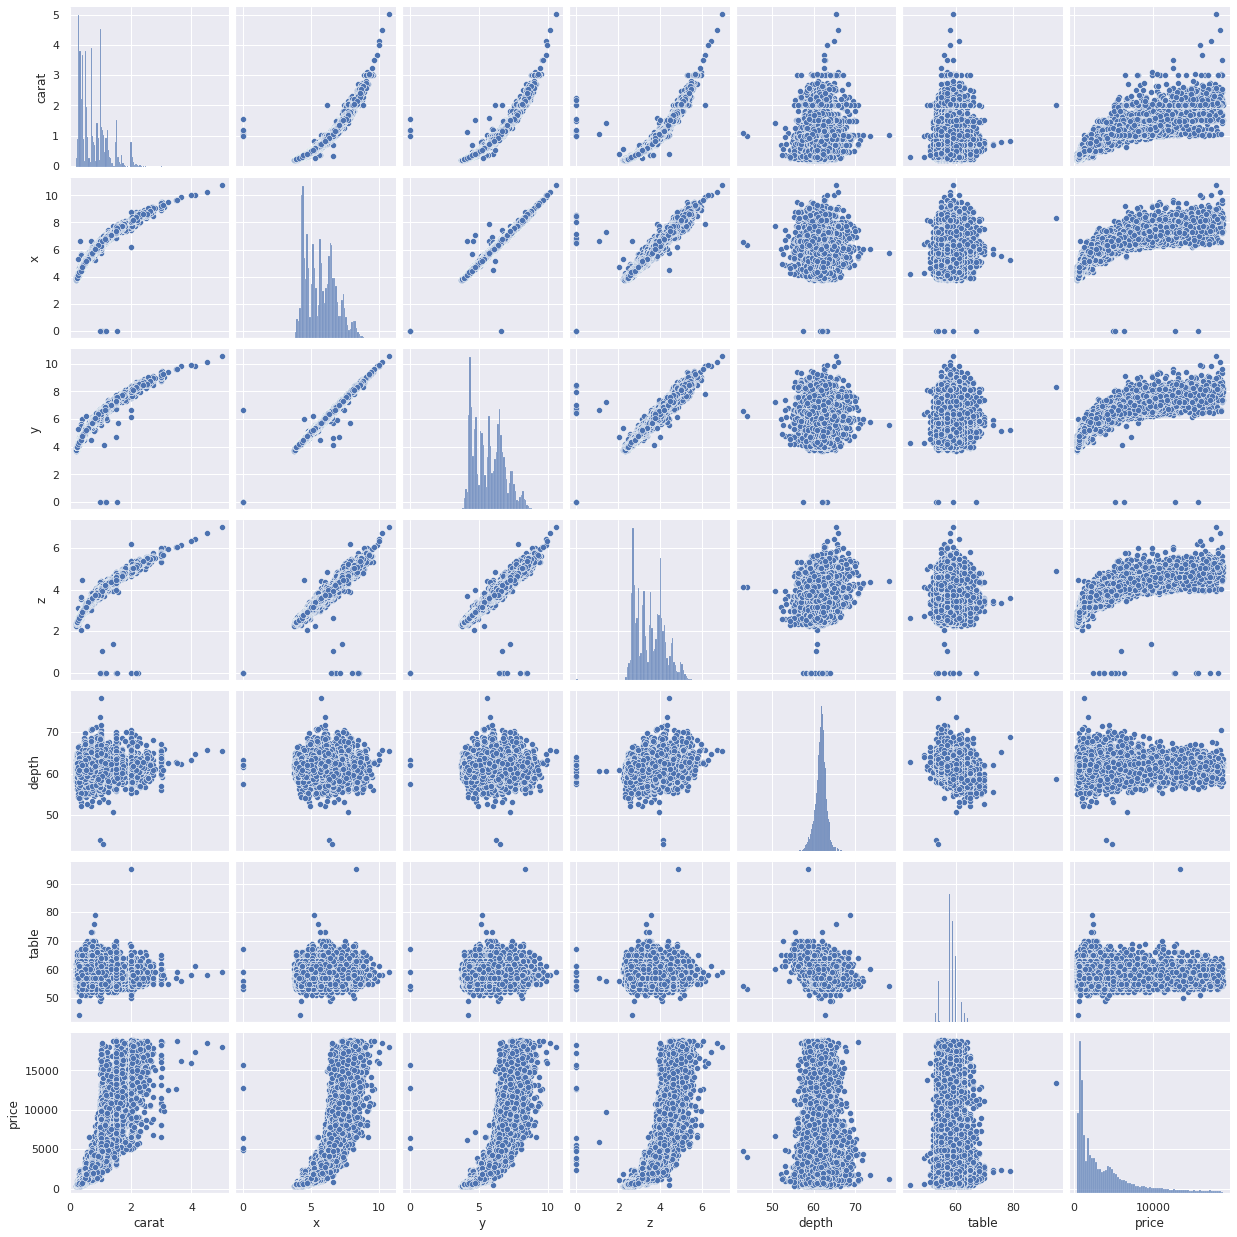

In [6]:
#fazendo um correlograma de todas as variáveis
sns.pairplot(train)
plt.show()

Carat, x, y, z aparentemente são varíaveis bem correlacionadas. Já price (que é nossa varíavel de interesse) aparentemente é pouco correlacionada com depth e table.

In [7]:
print("Correlação entre carat e x é", train["carat"].corr(train["x"]))
print("Correlação entre carat e y é", train["carat"].corr(train["y"]))
print("Correlação entre carat e z é", train["carat"].corr(train["z"]))
print("Correlação entre price e depth é", train["price"].corr(train["depth"]))
print("Correlação entre price e table é", train["price"].corr(train["table"]))

Correlação entre carat e x é 0.9757414131797605
Correlação entre carat e y é 0.975178234039697
Correlação entre carat e z é 0.9683853556088671
Correlação entre price e depth é -0.016468279883252553
Correlação entre price e table é 0.12836628286572707


Podemos ver então que carat tem uma correlação positiva alta em relação a  x, y e z. Portanto, utilizaremos somente carat, dentre essas, em nosso modelo de treino.

Além disso, pelo Correlograma apresentado acima, podemos ver que as variáveis depth e table não apresentam correlação com price e que, estas variáveis possuem uma correlação praticamente nula. Sendo assim, depth e table não seriam interessantes para predizer price.

Portanto, das variáveis contínuas usaremos carat e price (resposta).

Partindo de um modelo simples, apenas com 'carat'.





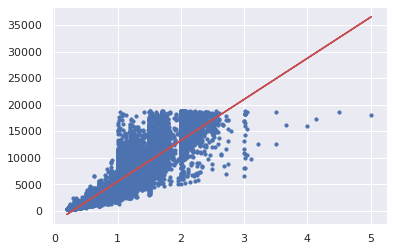

O valor de theta 0 = -2253.4853318410464
O valor de theta 1 = 7750.048255043164


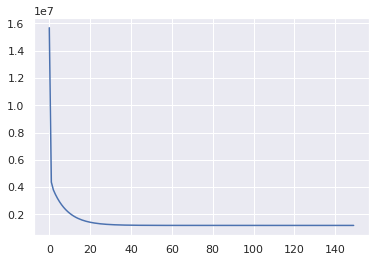

In [8]:
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn libraries.
teta0 = 1 #Aprox inicial para teta
teta1 = 1 #Aprox inicial para teta
m = len(train['price']) #Número de obs
lr = 0.5 #learning rate
y = train['price']   #variável resposta
x = train['carat']  #feature
hteta = teta0 + x*teta1  #função h(x)
conv = 100 
J = [1/(2*m)*sum((hteta-y)**2)]
ite = [0]
i = 1
while conv >0.001: #critério de parada (convergência)
  teta0 = teta0 - lr/m*sum(hteta-y) #atualizando os valores de teta simultaneamente
  teta1 = teta1 - lr/m*sum((hteta-y)*x) #atualizando os valores de teta simultaneamente
  hteta = teta0 + x*teta1
  jotinha = 1/(2*m)*sum((hteta-y)**2) #Função J na iteração
  J.append(jotinha)
  ite.append(i)
  if i >= 2:
    conv = abs(J[i]-J[i-1])
  i += 1

y_predict = teta0 + x*teta1 # valores preditos de price
  
plt.scatter(x, y, s=10)
plt.plot(x, y_predict, color = "r")
plt.show()

print('O valor de theta 0 =',teta0)
print('O valor de theta 1 =',teta1)

plt.figure(0)
plt.plot(ite,J)
plt.show()

In [9]:
# TODO: Linear Regression. Implement your solution with sklearn.linear_model.SGDRegressor.
# sckit-learn implementation: https://scikit-learn.org/stable/
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x = train['carat']  #feature
y = train['price']   #variável resposta


x = np.array(x)
y = np.array(y)
x = np.reshape(x,(40000,1)) #ajustando as variáveis para que elas possam ser utilizadas na função
y = np.reshape(y,(40000,1))

In [10]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x,y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:', regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[7750.2891194]]
Intercept: [-2253.70630488]
Root mean squared error: 2388167.343073712
R2 score: 0.8498323597919675


> What are the conclusions? (1-2 paragraphs)

O processo feito com o Batch Gradiend Descent (BGD) implementado por nós é um processo muito mais lento que o Stochasthic Gradieny Descent (SGD), porém ambos chegaram na mesma solução para o problema. O BGD utiliza todos os dados de treino para calcular o gradiente enquanto que o SGD usa apenas um exemplo de treino.

Além disso, observamos que houve uma pequena diferença entre os valores encontrados (nas casas decimais) para intercepto e coeficiente angular. Apesar desta diferença os métodos encontraram as mesmas soluções, ou seja, de maneiras diferentes mas com o ponto de convergência muito próximo.


2. (2 points) Sometimes, we need some more complex function to make good prediction. Devise and test more complex model. 


Análise das variáveis categóricas:


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


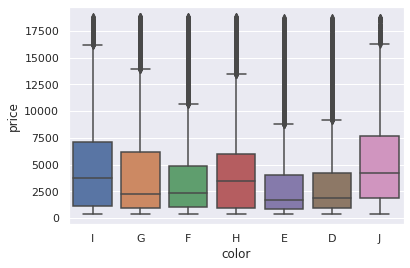

In [11]:
#Color
sns.boxplot(train['color'],train['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


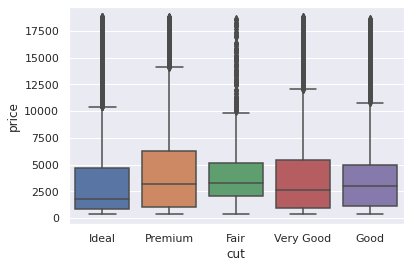

In [12]:
#Cut
sns.boxplot(train['cut'],train['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


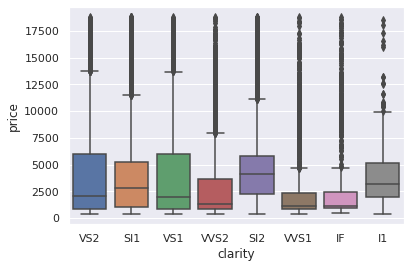

In [13]:
#Clarity
sns.boxplot(train['clarity'],train['price'])

Podemos ver que Cut apresenta uma distribuição dos dados de price muito parecida para todos os tipos de corte. Já clarity e color aparentam ter distribuições diferentes entre as subcategorias. 

Visando um modelo mais simples iremos utilizar apenas clarity, pois é a variável com maior discrepância na distribuição de price.

In [14]:
#Transformando as variáveis com One-Hot-Enconding
mat_col = pd.get_dummies(train['color'])
mat_c = pd.get_dummies(train['clarity'])
mat_cut = pd.get_dummies(train['cut'])

In [19]:
# TODO: Complex model. Implement your solution. You cannot use scikit-learn libraries.

# tetas iniciais
teta0 = 1 
teta1 = 1
teta2 = 1
tetavs2 = 1
tetasi1 = 1
tetavs1 = 1
tetavvs2 = 1
tetasi2 = 1
tetavvs1 = 1
tetaif = 1
tetai1 = 1

#Implementando loopings para buscar convergência (Batch Gradient Descent)
m = len(train['price'])
lr = 0.5 
y = train['price']
x = train['carat']
hteta = teta0+ x*teta1+ teta2*(x**(2))+tetavs2*mat_c['VS2']+ tetasi1*mat_c['SI1']+ tetavs1*mat_c['VS1']+ tetavvs2*mat_c['VVS2']+ tetasi2*mat_c['SI2']+ tetavvs1*mat_c['VVS1']+ tetaif*mat_c['IF']+ tetai1*mat_c['I1']
conv =100
J = [1/(2*m)*sum((hteta-y)**2)]
i = 1
ite = [0]

while conv>0.001:
  teta0 = teta0 - lr/m*sum(hteta-y)
  teta1 = teta1 - lr/m*sum((hteta-y)*x)
  teta2 = teta2 - lr/m*sum((hteta-y)*(x**(2)))
  tetavs2 = tetavs2 - lr/m*sum((hteta-y)*mat_c['VS2'])
  tetasi1 = tetasi1 - lr/m*sum((hteta-y)*mat_c['SI1'])
  tetavs1 = tetavs1 - lr/m*sum((hteta-y)*mat_c['VS1'])
  tetavvs2 = tetavvs2 - lr/m*sum((hteta-y)*mat_c['VVS2'])
  tetasi2 = tetasi2 - lr/m*sum((hteta-y)*mat_c['SI2'])
  tetavvs1 = tetavvs1 - lr/m*sum((hteta-y)*mat_c['VVS1'])
  tetaif = tetaif - lr/m*sum((hteta-y)*mat_c['IF'])
  tetai1 = tetai1 - lr/m*sum((hteta-y)*mat_c['I1'])
  jotinha = 1/(2*m)*sum((hteta-y)**2) #Função J na iteração
  J.append(jotinha)
  hteta = teta0+ x*teta1+teta2*(x**(2))+ tetavs2*mat_c['VS2']+ tetasi1*mat_c['SI1']+ tetavs1*mat_c['VS1']+ tetavvs2*mat_c['VVS2']+ tetasi2*mat_c['SI2']+ tetavvs1*mat_c['VVS1']+ tetaif*mat_c['IF']+ tetai1*mat_c['I1']
  ite.append(i)
  if i >= 2:
    conv = abs(J[i]-J[i-1])
  i += 1

print("A função custo após a definição dos tetas (atráves do BGD) é:", J[-1])

A função custo após a definição dos tetas (atráves do BGD) é: 830243.8268335231


Vemos que o valor da função custo nesse modelo foi menor que no modelo mais simples. Com isso, esse será o modelo mais complexo a ser validado em seguida.

In [20]:
#Calculando a função custo para os dados de validação:
mat_c_val = pd.get_dummies(validation['clarity'])
x_val = validation['carat']
y_val = validation['price']
m = len(y_val)
hteta = teta0+ x_val*teta1+ teta2*(x_val**(2))+tetavs2*mat_c_val['VS2']+ tetasi1*mat_c_val['SI1']+ tetavs1*mat_c_val['VS1']+ tetavvs2*mat_c_val['VVS2']+ tetasi2*mat_c_val['SI2']+ tetavvs1*mat_c_val['VVS1']+ tetaif*mat_c_val['IF']+ tetai1*mat_c_val['I1']
custo_val = 1/(2*m)*sum((hteta-y_val)**2)
print("A função custo do modelo complexo na validação é:", custo_val)

A função custo do modelo complexo na validação é: 864339.0016749448


Por fim vamos testar o modelo, já que a nossa validação obteve um valor da função custo muito próximo ao dos dados de treino. Lembrando que esta será a única vez que testaremos o nosso modelo ~(dados de teste nem existem né rsrs)~ e assim avaliaremos a função custo para estes dados.


In [21]:
#Teste do modelo:
teste = pd.read_csv("/content/drive/My Drive/Colab Notebooks/diamonds-test.csv")
x_tes = teste['carat']
y_tes = teste['price']
mat_c_tes = pd.get_dummies(teste['clarity'])
m = len(y_tes)
hteta = teta0+ x_tes*teta1+ teta2*(x_tes**(2))+tetavs2*mat_c_tes['VS2']+ tetasi1*mat_c_tes['SI1']+ tetavs1*mat_c_tes['VS1']+ tetavvs2*mat_c_tes['VVS2']+ tetasi2*mat_c_tes['SI2']+ tetavvs1*mat_c_tes['VVS1']+ tetaif*mat_c_tes['IF']+ tetai1*mat_c_tes['I1']
custo_tes = 1/(2*m)*sum((hteta-y_tes)**2)
print("A função custo do modelo complexo no teste é:",custo_tes)

A função custo do modelo complexo no teste é: 818994.686719801


O modelo complexo quando testado obteve um valor da função custo muito próximo que do treino, mas menor que o da validação.

> What are the conclusions? (1-2 paragraphs)

Atráves da observação do modelo mais simples, criamos um modelo com a variável "clarity" e com "carat" em uma função polinomial de segundo grau. Atráves do treino e validação, percebemos que a função custo foi muito parecida nos dois.

No teste foi executado o modelo e calculado a função custo. Foi obtido um valor próximo que o do treino e menor que da validação. Portanto, com a validação definimos nosso modelo final e no teste o modelo mostrou que o mesmo pode prever bem.


3. (1 point) Plot the cost function vs. number of iterations in the training set and analyze the model complexity. 

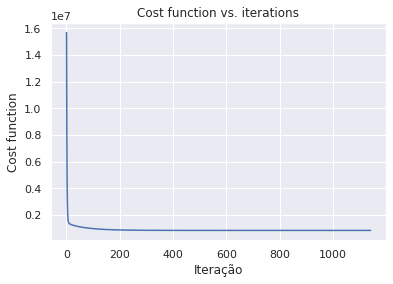

In [22]:
# TODO: Plot the cost function vs. number of iterations in the training set.
plt.plot(ite,J)
plt.xlabel('Iteração')
plt.ylabel('Cost function')
plt.title('Cost function vs. iterations')
plt.show()

Pode-se ver que a função custo nas primeiras iterações tem valores muito altos, mas rapidamente ela tem um forte declínio conforme as iterações vão aumentando. Ela tem diminuição significante até completar aproximadamente 1100 iterações, mas ainda com um valor alto de custo.

 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

Sabemos que conforme o modelo for mais complexo, o viés vai ser menor para o treino. Claramente, nosso último modelo é mais complexo por ter um polinômio e mais varíaveis. Mas pelo gráfico acima, percebemos que a função custo continua sendo bem alta, mesmo sendo menor do que a regressão linear simples. Talvez com um grau de polinomio maior e/ou mais variáveis teriamos uma função custo menor para o treino e um modelo mais complexo, porém, teriamos uma chance maior de ser um overfitting.

Pensando em evitar o overffiting, as melhores ações seriam analisar a função custo do treino e a função custo da validação com modelos diferentes (complexidades diferentes) e ver qual deles possuem uma função custo baixa tanto para o treino, como para a validação.

4. (3 points) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. You should implement your solutions. What are the conclusions?


Custo: 1194083.6743084877


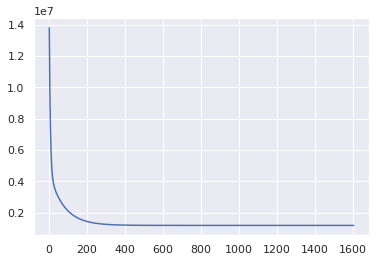

In [23]:
# TODO: Gradient Descent (GD) with different learning rates. Implement your solution. You cannot use scikit-learn libraries.
#Repetindo o mesmo código para a parte 1 da questão 1

#Learning rate = 0.05
teta0 =[0,1] 
teta1 = [0,1]
m = len(train['price'])
lr = 0.05
y = train['price']
x = train['carat']
hteta = teta0[1] + x*teta1[1]
custo = []
i = 1
ite = []
while abs(teta0[i] - teta0[i-1]) >0.001 or abs(teta1[i] - teta1[i-1])>0.001:
  t0 = teta0[i] - lr/m*sum(hteta-y)
  t1 = teta1[i] - lr/m*sum((hteta-y)*x)
  teta0.append(t0)
  teta1.append(t1)
  hteta = teta0[i+1] + x*teta1[i+1]
  cst = 1/(2*m)*sum((hteta-y)*(hteta-y))
  custo.append(cst)
  ite.append(i)
  i += 1

plt.plot(ite,custo)
print("Custo:",custo[-1])

Custo: 1194083.671561498


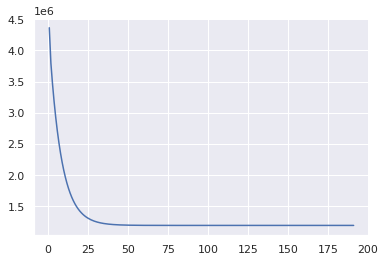

In [24]:
#Learning rate = 0.5
teta0 =[0,1] 
teta1 = [0,1]
m = len(train['price'])
lr = 0.5
y = train['price']
x = train['carat']
hteta = teta0[1] + x*teta1[1]
custo = []
i = 1
ite = []
while abs(teta0[i] - teta0[i-1]) >0.001 or abs(teta1[i] - teta1[i-1])>0.001:
  t0 = teta0[i] - lr/m*sum(hteta-y)
  t1 = teta1[i] - lr/m*sum((hteta-y)*x)
  teta0.append(t0)
  teta1.append(t1)
  hteta = teta0[i+1] + x*teta1[i+1]
  cst = 1/(2*m)*sum((hteta-y)*(hteta-y))
  custo.append(cst)
  ite.append(i)
  i += 1

plt.plot(ite,custo)
print("Custo:",custo[-1])

Custo: nan


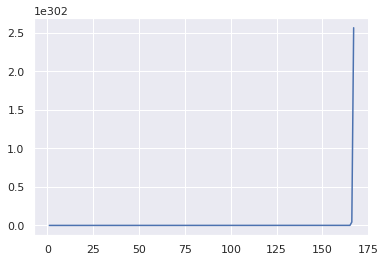

In [25]:
#Learning rate = 5
teta0 =[0,1] 
teta1 = [0,1]
m = len(train['price'])
lr = 5
y = train['price']
x = train['carat']
hteta = teta0[1] + x*teta1[1]
custo = []
i = 1
ite = []
while abs(teta0[i] - teta0[i-1]) >0.001 or abs(teta1[i] - teta1[i-1])>0.001:
  t0 = teta0[i] - lr/m*sum(hteta-y)
  t1 = teta1[i] - lr/m*sum((hteta-y)*x)
  teta0.append(t0)
  teta1.append(t1)
  hteta = teta0[i+1] + x*teta1[i+1]
  cst = 1/(2*m)*sum((hteta-y)*(hteta-y))
  custo.append(cst)
  ite.append(i)
  i += 1

plt.plot(ite,custo)
print("Custo:",custo[-1])

In [ ]:
# TODO: Compare the GD-based solutions (e.g., Batch, SGD, Mini-batch) with Normal Equation. Implement your solution. You cannot use scikit-learn libraries.
#Aplicando a normal equation
l = len(train)
x0 = [1]*l
a = [x0,train['carat']]
X = np.matrix.transpose(np.matrix(a))
Y = np.matrix.transpose(np.matrix(train['price']))
theta = np.linalg.inv((np.matrix.transpose(X)*X))*np.matrix.transpose(X)*Y
print('O theta 0 é:',float(theta[0]), 'e o theta 1:', float(theta[1]),'pelo método normal.')


> What are the conclusions? (2-4 paragraphs)

Podemos ver que quando vamos aumentando o learning rate, a função de custo tende a ficar cada vez maior e, o nosso procedimento não converge. Sendo assim, a função de custo não é minimizada e não conseguimos achar os valores de theta0 e theta1. O Learning rate = 0.5 apresentou diferença com um número menor de iterações em relação ao learning rate de 0.05 (porque o pulo de 0.5 é maior). Já o de 5 não foi adequado. Portanto, para este conjunto de dados o learning rate de 0.5 é o melhor.

Utilizando o método normal obtivemos os mesmos valores para os thetas pelo método de BGD (Batch Gradient Descent), sendo assim podemos concluir que para este conjunto de dados os métodos normal e BGD coincidem.

